In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/Datasets/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

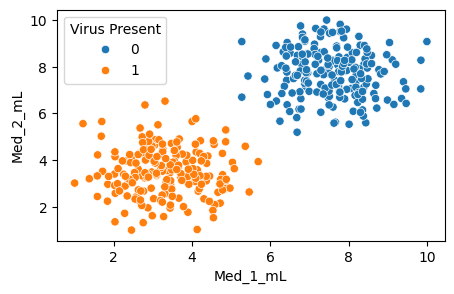

In [5]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Med_1_mL',y = 'Med_2_mL',hue = 'Virus Present',data = df)

In [6]:
X = df.drop("Virus Present",axis=1)
y = df["Virus Present"]

# Support Vector Machine

In [7]:
svc = SVC(kernel='linear',C=1000)
svc.fit(X,y)
svc

SVC(C=1000, kernel='linear')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def svm_margin_module(model, X, y, resolution=300):
    """
    Visualize SVM decision boundary, margins, and support vectors
    for a trained SVC model (2D data only).

    Parameters:
    model : trained sklearn.svm.SVC
    X     : training features (n_samples, 2)
    y     : training labels
    """

    # Define grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )

    # Decision function (inbuilt SVC method)
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(8, 6))

    # Margins and decision boundary
    plt.contour(xx, yy, Z,
                levels=[-1, 0, 1],
                linestyles=['--', '-', '--'],
                colors='black')

    # Training points
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap='coolwarm', edgecolor='k')

    # Support vectors
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=120, facecolors='none',
                edgecolors='black', label='Support Vectors')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Separation with Margins")
    plt.legend()
    plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


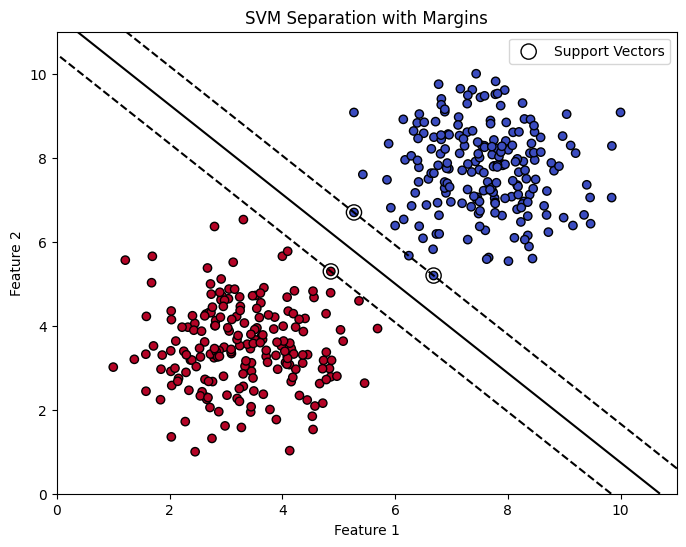

In [13]:
from sklearn.svm import SVC
# from svm_margin_module import svm_margin_module

# svc = SVC(kernel='rbf')
# svc.fit(X_train, y_train)

svm_margin_module(svc,X.values,y.values)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


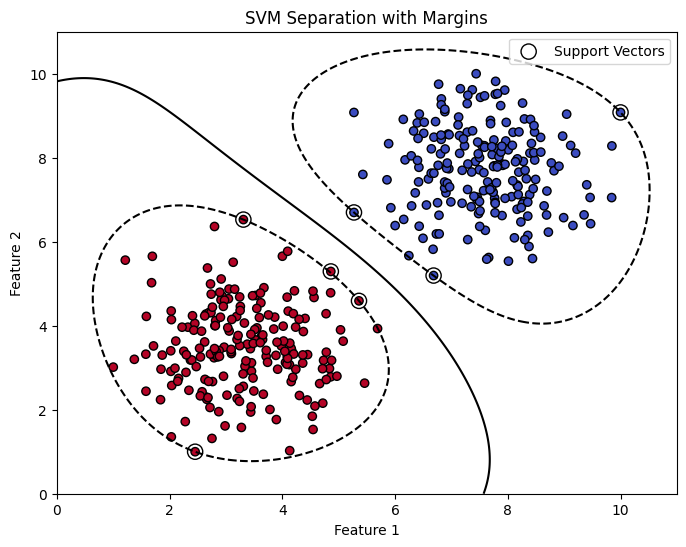

In [14]:
svc = SVC(kernel="rbf",C=5)
svc.fit(X,y)
svm_margin_module(svc,X.values,y.values)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


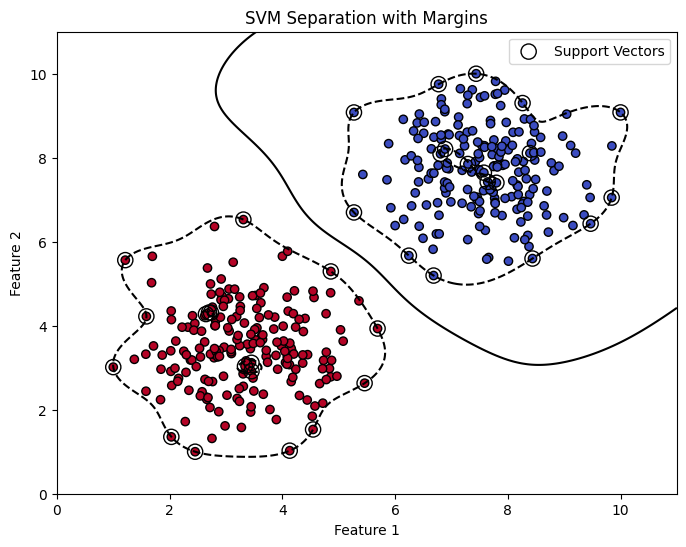

In [16]:
svc = SVC(kernel="rbf",C=5,gamma='auto')
svc.fit(X,y)
svm_margin_module(svc,X.values,y.values)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


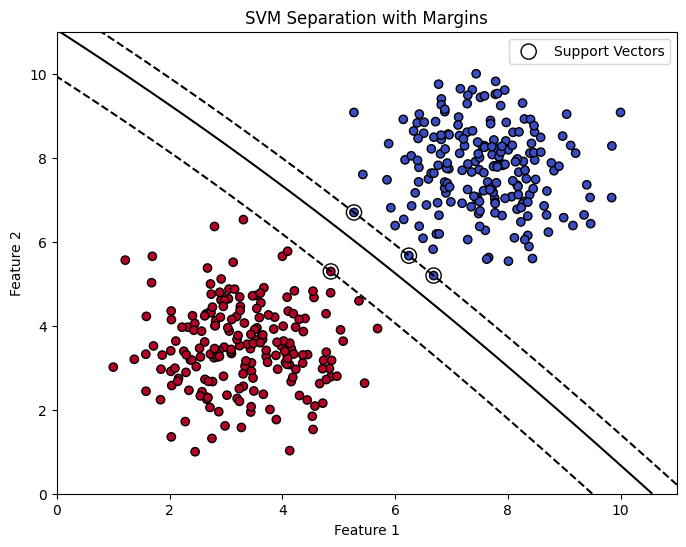

In [15]:
svc = SVC(kernel="poly",C=1,degree=8)
svc.fit(X,y)
svm_margin_module(svc,X.values,y.values)

# Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
svm = SVC()
parameters = {"C":[0.001,0.01,0.1,0.5,1],
              "kernel":["linear",'rbf']}

In [19]:
grid = GridSearchCV(svm,param_grid=parameters)
grid.fit(X,y)
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf']})

In [20]:
grid.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [21]:
grid.best_score_

np.float64(1.0)